https://www.youtube.com/watch?v=aBVGKoNZQUw

In [ ]:
# !pip install cython lap motmetrics onemetric
# !pip install yolox-utilities
# !pip3 install -r ByteTrack/requirements.txt

In [27]:
import cv2
import numpy as np
from ultralytics import YOLO
# from inference import get_model
import supervision as sv
import torch
import torchvision
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


print('PyTorch version:', torch.__version__)
print('PyTorch Cuda eligibility:', torch.version.cuda)
print('Torchvision version:', torchvision.__version__)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device is:', device, '\n')
print(os.getcwd())

PyTorch version: 2.5.0
PyTorch Cuda eligibility: 12.1
Torchvision version: 0.20.0
Device is: cuda 

C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data


In [28]:
model = YOLO("runs/detect/train3/weights/best.pt")
SOURCE_VIDEO_PATH = "sample/online_video_1.mp4"
TARGET_VIDEO_PATH = "sample/online_video_1_result_3.mp4"

In [13]:
results = model.track(source=SOURCE_VIDEO_PATH, show=False, save=True, project="sample/", tracker="bytetrack.yaml")
# stream=True  # Enable streaming to avoid RAM accumulation



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/207) C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\sample\online_video_1.mp4: 384x640 1 art_sci_museum, 1 helix_bridge, 1 lv_marina_bay, 1 mbs, 1 mbs_hotel, 1 sg_river, 41.6ms
video 1/1 (frame 2/207) C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\sample\online_video_1.mp4: 384x640 1 art_sci_museum, 1 helix_bridge, 1 lv_marina_bay, 1 mbs, 1 mbs_hotel, 1

# FRAME TO FRAME DETECTION

In [ ]:
# # frame by frame

# box_annotator = sv.BoxAnnotator()
# dot_annotator = sv.DotAnnotator(
#     radius=15,
#     outline_thickness=5,
#     outline_color=sv.Color.from_hex('#FFFFFF')
# )

# rich_label_annotator = sv.RichLabelAnnotator(
#     font_path="<TTF_FONT_PATH>",
#     font_size=35,
#     text_position=sv.Position.TOP_CENTER,
#     text_padding=12,
#     border_radius=15,
#     smart_position=True
# )

# video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# print(video_info)
# video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
# frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# frame_skip = 1
# frame_count = 0

# with video_sink:
#     for frame in tqdm(frame_generator, total=video_info.total_frames):
#         if frame_count % frame_skip == 0:            
#             results = model(frame)[0]
#             # print(results.boxes)
#             # plt.imshow(results.orig_img)
#             detections = sv.Detections.from_ultralytics(results)
#             detections = detections.with_nms(threshold=0.7, class_agnostic=False)

#             # To pick the highest confidence per class. Only 1 detection per frame.
#             # Convert detections into a structured dictionary for processing.
#             detections_by_class = {}
#             for i in range(len(detections.class_id)):
#                 class_id = detections.class_id[i]
#                 if class_id not in detections_by_class or detections.confidence[i] > detections_by_class[class_id]['confidence']:
#                     detections_by_class[class_id] = {
#                         'xyxy': detections.xyxy[i],
#                         'confidence': detections.confidence[i],
#                         'class_id': class_id,
#                         'class_name': detections.data['class_name'][i]
#                     }
            
#             # Check if detections exist
#             if len(detections_by_class) > 0:
#                 filtered_xyxy = np.array([det['xyxy'] for det in detections_by_class.values()])
#                 filtered_confidence = np.array([det['confidence'] for det in detections_by_class.values()])
#                 filtered_class_id = np.array([det['class_id'] for det in detections_by_class.values()])
#                 filtered_class_name = np.array([det['class_name'] for det in detections_by_class.values()])

#                 # Create filtered detections object
#                 filtered_detections = sv.Detections(
#                     xyxy=filtered_xyxy, confidence=filtered_confidence, 
#                     class_id=filtered_class_id, data={'class_name': filtered_class_name}
#                 )

#                 labels = [f"{class_name} {confidence:.2f}" for class_name, confidence in zip(filtered_detections.data['class_name'], filtered_detections.confidence)]

#                 annotated_frame = frame.copy()
#                 annotated_frame = dot_annotator.annotate(annotated_frame, filtered_detections)
#                 annotated_frame = rich_label_annotator.annotate(annotated_frame, filtered_detections, labels=labels)
#             else:
#                 annotated_frame = frame  # No detections, keep original frame

#         else:
#             annotated_frame = frame  # Skip inference, just copy frame

#         video_sink.write_frame(annotated_frame)  # Always write to maintain FPS
#         frame_count += 1

# # sv.plot_image(annotated_frame)



# BYTETRACK ON VIDEO

In [29]:
# BYTETRACK on video
results = model.track(source=SOURCE_VIDEO_PATH, show=False, save=False, project="sample/", tracker="bytetrack.yaml")

box_annotator = sv.BoxAnnotator()
dot_annotator = sv.DotAnnotator(
    radius=15,
    outline_thickness=5,
    outline_color=sv.Color.from_hex('#FFFFFF')
)

rich_label_annotator = sv.RichLabelAnnotator(
    font_path="<TTF_FONT_PATH>",
    font_size=35,
    text_position=sv.Position.TOP_CENTER,
    text_padding=12,
    border_radius=15,
    smart_position=True
)

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
print(video_info)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

with video_sink:
    for result in results:
        frame = result.orig_img.copy()  # The current frame image    
        detections = sv.Detections.from_ultralytics(result)
        detections = detections.with_nms(threshold=0.7, class_agnostic=False)

        # To pick the highest confidence per class. Only 1 detection per frame.
        # Convert detections into a structured dictionary for processing.
        detections_by_class = {}
        for i in range(len(detections.class_id)):
            class_id = detections.class_id[i]
            if class_id not in detections_by_class or detections.confidence[i] > detections_by_class[class_id]['confidence']:
                detections_by_class[class_id] = {
                    'xyxy': detections.xyxy[i],
                    'confidence': detections.confidence[i],
                    'class_id': class_id,
                    'class_name': detections.data['class_name'][i]
                }
        
        # Check if detections exist
        if len(detections_by_class) > 0:
            filtered_xyxy = np.array([det['xyxy'] for det in detections_by_class.values()])
            filtered_confidence = np.array([det['confidence'] for det in detections_by_class.values()])
            filtered_class_id = np.array([det['class_id'] for det in detections_by_class.values()])
            filtered_class_name = np.array([det['class_name'] for det in detections_by_class.values()])

            # Create filtered detections object
            filtered_detections = sv.Detections(
                xyxy=filtered_xyxy, confidence=filtered_confidence, 
                class_id=filtered_class_id, data={'class_name': filtered_class_name}
            )

            labels = [f"{class_name} {confidence:.2f}" for class_name, confidence in zip(filtered_detections.data['class_name'], filtered_detections.confidence)]

            annotated_frame = frame.copy()
            annotated_frame = dot_annotator.annotate(annotated_frame, filtered_detections)
            annotated_frame = rich_label_annotator.annotate(annotated_frame, filtered_detections, labels=labels)
        else:
            annotated_frame = frame  # No detections, keep original frame

        video_sink.write_frame(annotated_frame)  # Always write to maintain FPS



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/207) C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\sample\online_video_1.mp4: 384x640 1 art_sci_museum, 1 helix_bridge, 1 lv_marina_bay, 1 mbs, 1 mbs_hotel, 1 sg_river, 42.9ms
video 1/1 (frame 2/207) C:\Users\ngyin\Documents\NUS Stackables\SP 1\Practice Module (landmark recognition)\data\sample\online_video_1.mp4: 384x640 1 art_sci_museum, 1 helix_bridge, 1 lv_marina_bay, 1 mbs, 1 mbs_hotel, 1

# BYTETRACK ON LIVESTREAM

In [ ]:
# Livestreaming

# # Define video capture (0 for webcam, or use an RTSP/HTTP stream URL)
# cap = cv2.VideoCapture(0)  # Change to 'rtsp://your_stream_url' for live streaming

# # Define annotators
# box_annotator = sv.BoxAnnotator()
# dot_annotator = sv.DotAnnotator(radius=15, outline_thickness=5, outline_color=sv.Color.from_hex('#FFFFFF'))
# rich_label_annotator = sv.RichLabelAnnotator(
#     font_path="<TTF_FONT_PATH>", font_size=35, text_position=sv.Position.TOP_CENTER,
#     text_padding=12, border_radius=15, smart_position=True
# )

# # Loop for livestreaming
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         print("Failed to grab frame, exiting...")
#         break

#     # Run YOLO tracking on the current frame
#     results = model.track(frame, persist=True, tracker="bytetrack.yaml")

#     if results and len(results) > 0:
#         result = results[0]  # Process the first result

#         detections = sv.Detections.from_ultralytics(result)
#         detections = detections.with_nms(threshold=0.7, class_agnostic=False)

#         # Select highest confidence detection per class
#         detections_by_class = {}
#         for i in range(len(detections.class_id)):
#             class_id = detections.class_id[i]
#             if class_id not in detections_by_class or detections.confidence[i] > detections_by_class[class_id]['confidence']:
#                 detections_by_class[class_id] = {
#                     'xyxy': detections.xyxy[i],
#                     'confidence': detections.confidence[i],
#                     'class_id': class_id,
#                     'class_name': detections.data['class_name'][i]
#                 }

#         # Annotate frame
#         if len(detections_by_class) > 0:
#             filtered_xyxy = np.array([det['xyxy'] for det in detections_by_class.values()])
#             filtered_confidence = np.array([det['confidence'] for det in detections_by_class.values()])
#             filtered_class_id = np.array([det['class_id'] for det in detections_by_class.values()])
#             filtered_class_name = np.array([det['class_name'] for det in detections_by_class.values()])

#             filtered_detections = sv.Detections(
#                 xyxy=filtered_xyxy, confidence=filtered_confidence,
#                 class_id=filtered_class_id, data={'class_name': filtered_class_name}
#             )

#             labels = [f"{class_name} {confidence:.2f}" for class_name, confidence in zip(filtered_detections.data['class_name'], filtered_detections.confidence)]

#             annotated_frame = dot_annotator.annotate(frame, filtered_detections)
#             annotated_frame = rich_label_annotator.annotate(annotated_frame, filtered_detections, labels=labels)
#         else:
#             annotated_frame = frame  # No detections, keep original frame
#     else:
#         annotated_frame = frame  # No results, keep original frame

#     # Display the frame
#     cv2.imshow("Live Tracking", annotated_frame)

#     # Break the loop when 'q' is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release resources
# cap.release()
# cv2.destroyAllWindows()

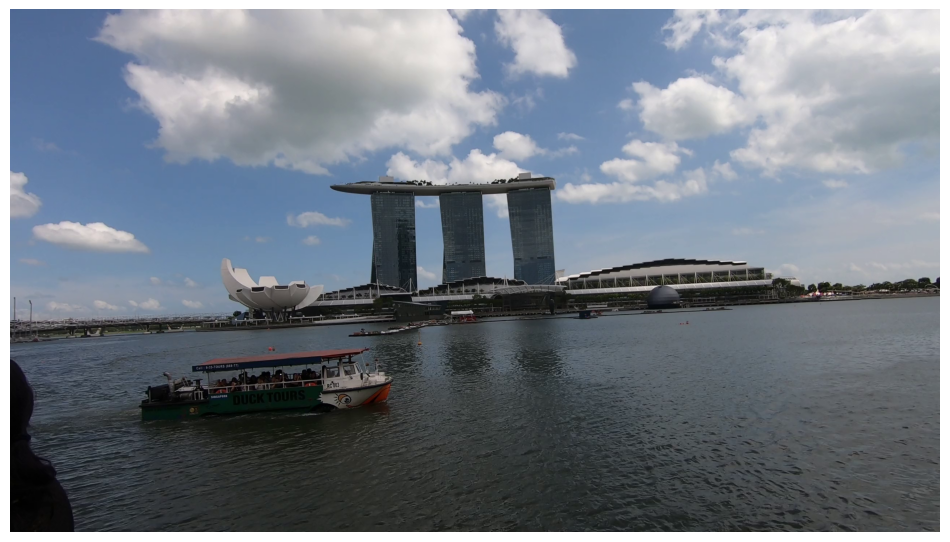

In [30]:
# # to visualize on frame 1
# frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
# test_f = next(frame_generator)
# sv.plot_image(test_f)
# # detections = sv.Detections.from_ultralytics(results).with_nms(threshold=0.7, class_agnostic=False)
# # detections